In [178]:
#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
import math
from collections import Counter
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Variables originales:

In [179]:
pd.options.display.max_columns = 50

data = pd.read_csv('data_set_cleaned.csv', header = 0, names=None)
data = data[data.Case1_Control0=='Positivo']
data.head()

,Case1_Control0,Edad,Genero,Cycle Time,Stance Percent,Stance Time,Step Length,Step Number,Step Time,Step Cadence,Stride Number,Stride Length,Swing Percent,Swing Time,Distance,Duration Time,Speed,Acceleration,Cycle Timel,Stance Percentl,Stance Timel,Step Lengthl,Step Numberl,Step Timel,Step Cadencel,Stride Numberl,Stride Lengthl,Swing Percentl,Swing Timel,Distancel,Duration Timel,Speedl,Accelerationl
0,Positivo,79,M,0.803979,0.644524,1.327075,0.796338,2,0.335486,58.280750,1,1.305580,0.325873,0.670972,1.979175,2.058999,0.961232,0.466844,0.701892,0.517225,0.701892,0.835550,2,0.312041,88.428185,1,0.185463,0.459888,0.624083,1.890646,1.357033,1.393220,1.026666
1,Positivo,79,M,0.826989,0.633677,1.326004,0.823259,2,0.352115,57.346196,1,1.257234,0.336541,0.704229,1.948560,2.092554,0.931188,0.445001,0.842031,0.553252,1.122035,0.870912,2,0.429035,59.169468,1,1.198056,0.423096,0.858070,1.923441,2.028073,0.948408,0.467640
2,Positivo,79,M,0.789131,0.610778,1.219237,0.739892,2,0.359121,60.114133,1,1.146374,0.359804,0.718242,1.759962,1.996203,0.881655,0.441666,0.795529,0.595647,1.263953,0.918151,2,0.405821,56.550877,1,1.059078,0.382493,0.811643,1.974094,2.121983,0.930306,0.438414
3,Positivo,68,M,1.193026,0.536687,1.263887,0.741654,2,0.476885,50.955888,1,1.293253,0.405002,0.953771,1.922531,2.354978,0.816369,0.346657,0.488694,0.589199,1.388086,0.804970,2,0.435792,50.936203,1,1.085094,0.369960,0.871583,1.951583,2.355888,0.828385,0.351623
4,Positivo,68,M,1.045567,0.508093,1.061983,0.817604,2,0.446011,57.412502,1,1.266147,0.426777,0.892023,1.972823,2.090137,0.943872,0.451584,0.834999,0.612826,1.232999,0.773111,2,0.358499,59.642470,1,1.189026,0.356362,0.716997,1.858186,2.011989,0.923557,0.459027


In [180]:

x = data.loc[: , ~data.columns.isin(['Case1_Control0','Genero'])]
x = preprocessing.scale(x.values)

y = data['Case1_Control0'].values

### Determinación del K (Variables originales)

#### Técnica del Codo:

In [181]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x)
    WSSs.append(km.inertia_)
WSSs

[2789.999999999999,
 1828.2146571793455,
 1635.994700973556,
 1474.963406624713,
 1324.8419650761925,
 1234.8675016175591,
 1147.6751502506268,
 1101.899857914111,
 1055.1841668817046,
 967.0606825890093,
 966.0225498654506,
 895.1655672996934,
 885.9993237271781,
 843.5976869707706]

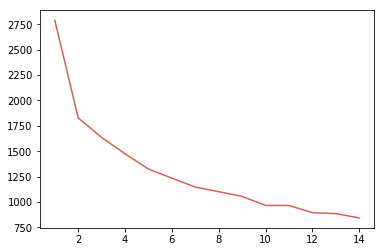

In [182]:
plt.plot(range(1,15),WSSs)

#### Silueta

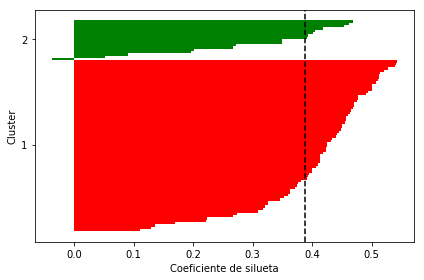

In [203]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

In [204]:
clusters = kmeans.predict(x)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0])

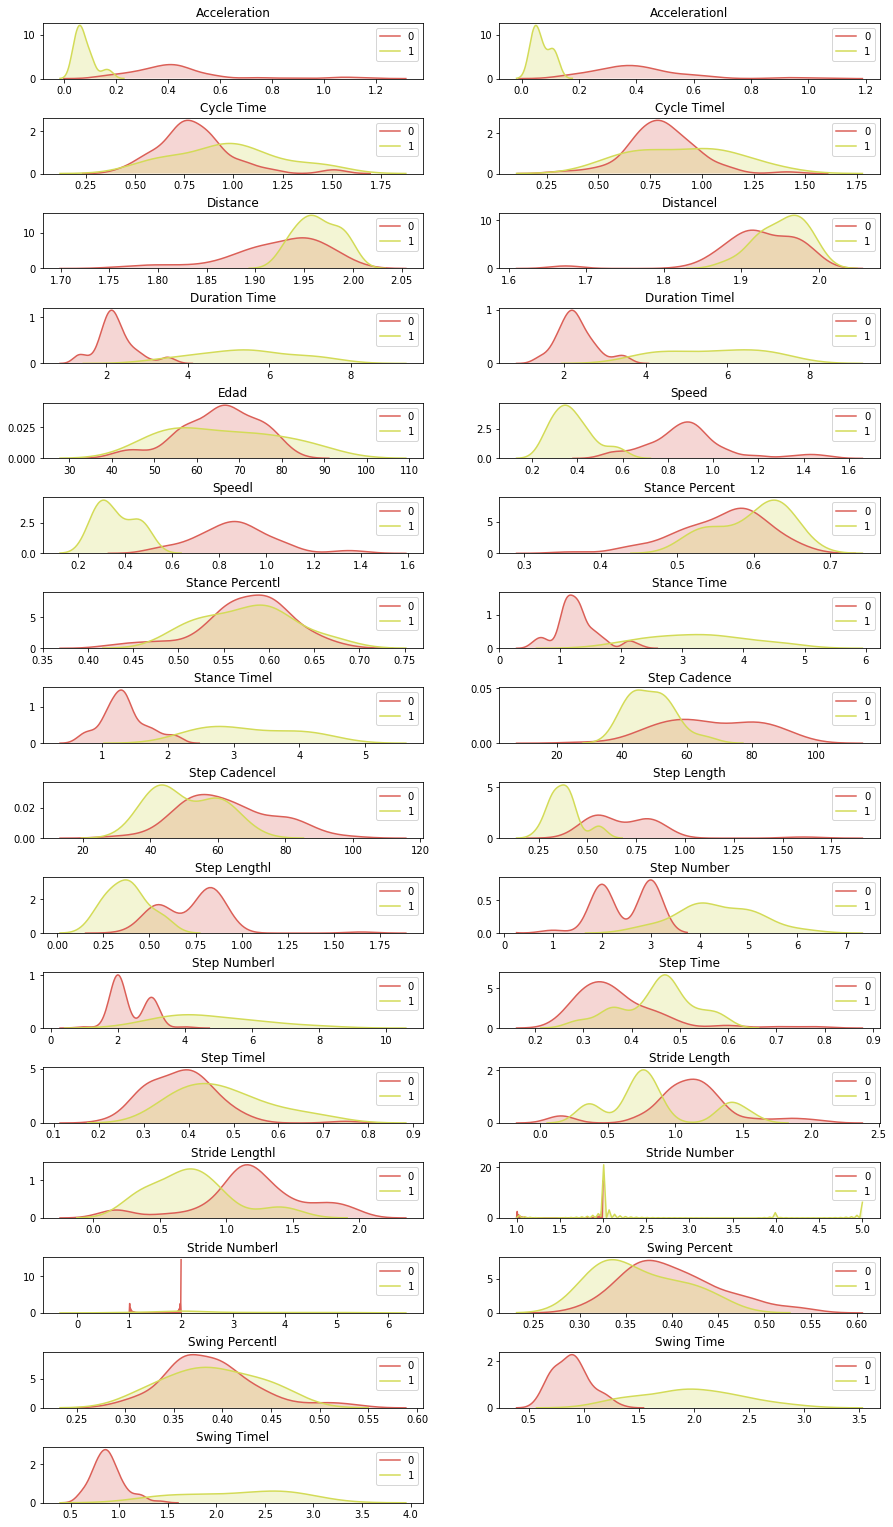

In [216]:
data.loc[:,'Cluster'] = clusters
data.head()

pk_var_num_uni = ['Edad','Cycle Time', 'Stance Percent', 'Stance Time', 'Step Length', 'Step Number',
       'Step Time', 'Step Cadence', 'Stride Number', 'Stride Length',
       'Swing Percent', 'Swing Time', 'Distance', 'Duration Time', 'Speed',
       'Acceleration','Cycle Timel', 'Stance Percentl', 'Stance Timel', 'Step Lengthl',
       'Step Numberl', 'Step Timel', 'Step Cadencel', 'Stride Numberl',
       'Stride Lengthl', 'Swing Percentl', 'Swing Timel', 'Distancel',
       'Duration Timel', 'Speedl', 'Accelerationl']

pk_var_num_uni = np.sort(pk_var_num_uni)
fig = plt.figure(figsize=(15,25))
i = 1
for var_num in pk_var_num_uni:
    sns.set_palette("hls")
    ax = fig.add_subplot((len(pk_var_num_uni)/2)+2,2,i)
    sns.kdeplot(data.loc[data.Cluster==0][var_num], shade=True,  ax=ax);
    sns.kdeplot(data.loc[data.Cluster==1][var_num], shade=True,  ax=ax);
    plt.title(var_num)
    plt.subplots_adjust(top=1)
    plt.subplots_adjust(hspace=0.7)
    plt.legend(['0','1'])
    i+=1

In [206]:
centers = kmeans.cluster_centers_
cluster_carac = pd.DataFrame(centers, columns=data.columns[data.columns.isin(pk_var_num_uni)])
cluster_carac

,Edad,Cycle Time,Stance Percent,Stance Time,Step Length,Step Number,Step Time,Step Cadence,Stride Number,Stride Length,Swing Percent,Swing Time,Distance,Duration Time,Speed,Acceleration,Cycle Timel,Stance Percentl,Stance Timel,Step Lengthl,Step Numberl,Step Timel,Step Cadencel,Stride Numberl,Stride Lengthl,Swing Percentl,Swing Timel,Distancel,Duration Timel,Speedl,Accelerationl
0,-0.016536,-0.145805,-0.128619,-0.414677,0.266228,-0.374180,-0.161888,0.225814,-0.300264,0.125074,0.129948,-0.420785,-0.161055,-0.424739,0.358336,0.289964,-0.101264,-0.002014,-0.419657,0.307131,-0.371899,-0.193840,0.169542,-0.349769,0.195703,-0.009364,-0.428049,-0.108746,-0.432199,0.378142,0.317885
1,0.071009,0.626102,0.552304,1.780672,-1.143215,1.606774,0.695168,-0.969672,1.289369,-0.537080,-0.558010,1.806900,0.691591,1.823881,-1.538737,-1.245138,0.434838,0.008648,1.802057,-1.318857,1.596978,0.832372,-0.728033,1.501950,-0.840370,0.040212,1.838094,0.466969,1.855911,-1.623788,-1.365037


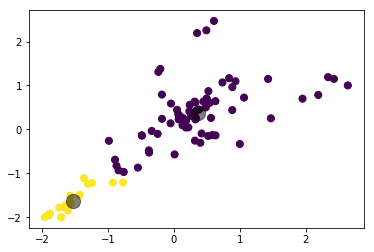

In [214]:
f1 = 14 #Speed
f2 = 29  #Speedl

plt.scatter(x[:, f1], x[:, f2], c=clusters, s=50, cmap='viridis')
plt.scatter(centers[:, f1], centers[:, f2], c='black', s=200, alpha=0.5);

Cluster 0:
- Poca duración de la prueba, debido a que una persona sana no tiene dificultad de movimiento.
- Tiempo de balanceo corto ya que una persona sana no tiene dificultad en la actividad motriz.

Cluster 1:
- Disminución en la aceleración relacionado a un grado avanzado de la enfermedad (rigidez muscular)
- Poca velocidad de la articulación de los tobillo, ocacionada por dificultad de movimiento.
- Disminución de la distancia de zancada ocacionada por la dificultad de movimiento.


Bajo esta "caracterización", se supone que:  
- **Cluster 0:** Representa las personas con un grado de severidad bajo de la enfermedad.   
- **Cluster 1:** Representa las personas con un grado de severidad medio-alto de la enfermedad de Parkinson.

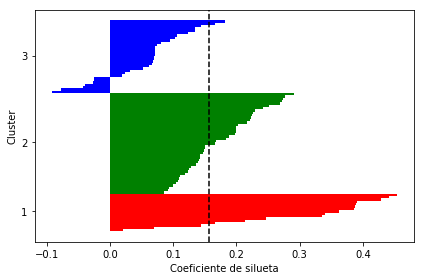

In [184]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

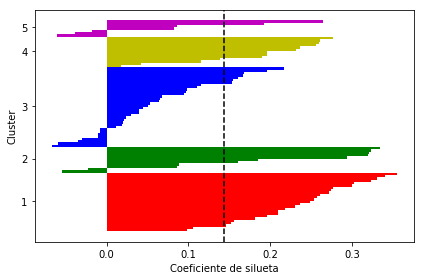

In [189]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'm']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

#### Calinski Harabaz

In [190]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x)
    CH = calinski_harabaz_score(x, km.labels_) 
    CHs.append(CH)
CHs

[46.2949522015099,
 30.68422561379783,
 25.558407420442506,
 23.5006204987931,
 21.157108708911785,
 19.795520608107942,
 17.94617472422053,
 16.646392982024274,
 16.755830668528734,
 14.916237574443691,
 15.00962413593807,
 13.789330697630014,
 13.488618501715777]

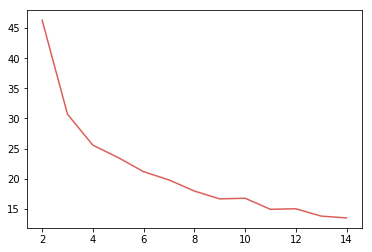

In [191]:
plt.plot(range(2,15), CHs)

Silueta y CH muestran que para K=3 se obtiene el mayor score y despues de 5 la métrica decae mucho.

## PCA

In [192]:
data_pca = pd.read_csv('data_set_pca.csv', header = 0, names=None)
idx_posi=data[data.Case1_Control0=='Positivo'].index

data_pca =  data_pca.loc[idx_posi,:]
x_pca = data_pca.values

data_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.776297,-3.552713,-0.337127,-0.240502,-0.488268,-0.357979,-0.690824,0.409840,-0.433333,-1.853521
1,-1.029356,-0.358651,-0.497649,-1.646325,-0.174243,0.273092,-1.152717,0.396661,-0.159337,-1.653575
2,-1.284946,0.261893,-0.981563,-1.674963,-0.891581,1.766912,-1.611825,-0.886463,0.351474,1.606582
3,-0.006673,0.437140,0.837705,-1.440532,1.088074,0.581807,0.265314,-0.194801,-2.149082,0.335158
4,-1.030385,0.937285,1.808254,-0.811581,0.653366,-0.604481,0.253954,1.318449,-1.033979,-0.023333


### Determinación del K (PCA)

#### Tecnica del codo:

In [193]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_pca)
    WSSs.append(km.inertia_)
WSSs

[3042.2957299805234,
 1733.585250882289,
 1508.3712925050727,
 1320.452706130559,
 1186.1863148972948,
 1078.4054883822755,
 1021.5009194270631,
 964.4533038876452,
 896.2516172895778,
 858.3935587316568,
 799.7210737470643,
 758.6200053521486,
 728.6559231948108,
 684.4216168039343]

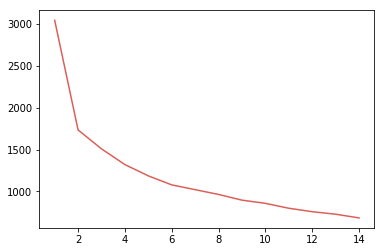

In [194]:
plt.plot(range(1,15),WSSs)

#### Silueta

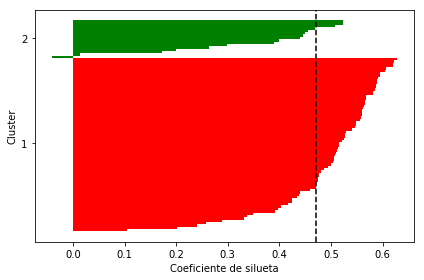

In [195]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x_pca)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x_pca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'm']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

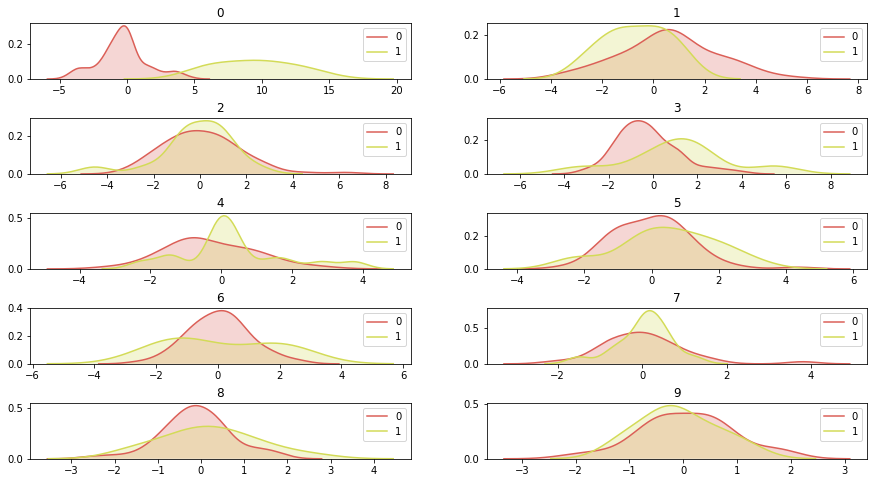

In [196]:
kmeans.fit(x_pca,y)
clusters = kmeans.predict(x_pca)

data_pca.loc[:, 'Cluster'] = clusters
data_pca.head()

vec_var_num = ['0','1','2','3','4','5','6','7','8','9']

fig = plt.figure(figsize=(15,25))
i = 1
for var_num in vec_var_num:
    sns.set_palette("hls")
    ax = fig.add_subplot((len(pk_var_num_uni)/2)+2,2,i)
    sns.kdeplot(data_pca.loc[data_pca.Cluster==0][var_num], shade=True,  ax=ax);
    sns.kdeplot(data_pca.loc[data_pca.Cluster==1][var_num], shade=True,  ax=ax);
    plt.title(var_num)
    plt.subplots_adjust(top=1)
    plt.subplots_adjust(hspace=0.7)
    plt.legend(['0','1'])
    i+=1

In [197]:
centers = kmeans.cluster_centers_
cluster_carac = pd.DataFrame(centers)
cluster_carac

,0,1,2,3,4,5,6,7,8,9
0,-0.308658,0.604939,0.122039,-0.258158,-0.294228,0.007246,0.035891,0.032337,-0.109157,0.062904
1,9.448250,-0.658677,-0.158945,1.098690,0.349202,0.482816,0.089220,0.045342,0.206522,-0.088345


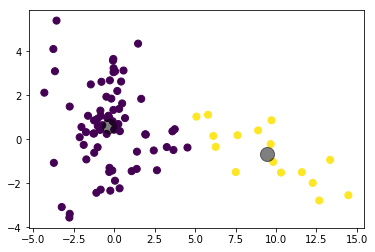

In [198]:
f1 = 0
f2 = 1

plt.scatter(x_pca[:, f1], x_pca[:, f2], c=clusters, s=50, cmap='viridis')
plt.scatter(centers[:, f1], centers[:, f2], c='black', s=200, alpha=0.5)

Como se muestra en los gráficos de distribución y en el scatterplot(), el componente 0 es la dimensión que separa ambos cluster de forma mas significativa. Según el análisis de PCA (ver 1.EDA).

El componente 0 tiene una gran influencia positiva por:  
- Tiempo de zancada.
- Tiempo de duración
- Tiempo de balanceo
y de forma negativa:   
- Distancia

- **Cluster 0:** Bajo nivel de componente 0, lo cual indica que la persona tiene buena capacidad motriz (Grado de severidad bajo de la enfermedad de Parkinson)  
- **Cluster 1:** Alto nivel de componente 0, lo cual parece clasificar a las personas con síntoma avanzados de Parkinson.

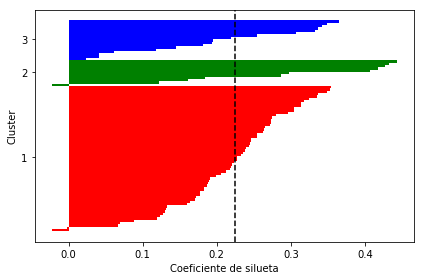

In [199]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x_pca)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x_pca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'm']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

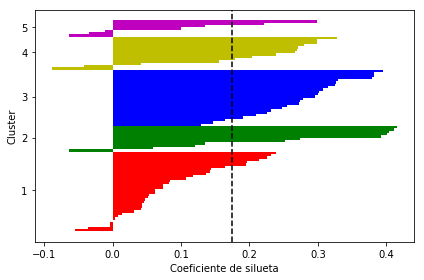

In [200]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x_pca)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x_pca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'm']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

#### Calinski-Harabaz

In [201]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_pca)
    CH = calinski_harabaz_score(x_pca, km.labels_) 
    CHs.append(CH)
CHs

[66.43256920998371,
 44.23692850807669,
 37.38074055046993,
 33.25137423620817,
 30.59457357579305,
 27.365935439720566,
 25.237551419443463,
 24.243969240141755,
 22.614875830519733,
 22.153148598717113,
 21.34578160635095,
 20.3743014422815,
 20.140355706273287]

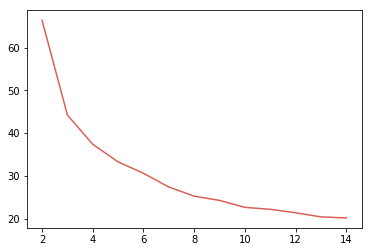

In [202]:
plt.plot(range(2,15), CHs)

Para el data set procesado con PCA la mejor partición es k=2.